In [2]:
#rm(list=ls())
library(magrittr)
library(dplyr)
#setwd("/home/huaqingj/MyResearch/HistTrial")
setwd("/home/r6user2/Documents/TQ/HistTrial")
source("utils.R")
library(parallel)

In [3]:
CI.fn <- function(errs){
  m.v <- mean(errs)
  sd.v <- sd(errs)
  se <- sd.v/sqrt(length(errs))
  low <- m.v - 1.96*se
  up <- m.v + 1.96*se
  rvs <- c(low, m.v, up)
  names(rvs) <- c("lower", "mean", "upper")
  rvs
}


### Some parameters

In [4]:
betass <- list(para1=c(2, 1, -1, 3, -2), 
              para2=c(3, 1, 2, 4, 2), 
              para3=c(0, -1, -1, 3, 2), 
              para4=c(2, 0, -1, 4, -2)
                  )

alpss <-  list(para1=c(2, 1, -1, 3, -2), 
             para3=c(3, 1, 2, 4, 2), 
             para2=c(0, -1, -1, 3, 2), 
             para4=c(2, 0, -1, 4, -2) )

# Simulation 
nSimu <- 100 # num of times to calculate the post variance and tau2
n <- 100
b <- 2
phi0 <- 2
x.tps <- c(2, 2, "c", "c")
#x.tps <- c(2, 2, 2, 2)
lam <- 0.1

### Test tau2 and posterior variance

In [76]:
H <- diag(c(0.1, 0.1, 0.1, 0.1))

In [77]:
varss <- c()
tauss <- c()
idxss <- c()
for (i in 1:nSimu){
    # train data
    Xs.t <- gen.Data.Xs(n, x.tps)
    betMat <- sub.Paras.fn(Xs.t, betass)
    Zs <- rep(0, n)
    Ys <- curMean.fn(Xs.t, Zs, betMat, b) + rnorm(n, sd=phi0)
    data <- cbind(Ys, Zs, Xs.t)
    data <- as.data.frame(data)
    names(data)[1:2] <- c("Y", "Z")
    
    lam <- 0.05
    #H <- diag(c(bw.nrd(data$X1), bw.nrd(data$X2), bw.nrd(data$X3), bw.nrd(data$X4)))
    
    alpMat <- sub.Paras.fn(Xs.t, alpss)
    Theta0s <- curMean.fn(Xs.t, Zs, alpMat, b=0)
    res <- info.est.fn(Theta0s, data, H, lam)
    
    # Test data points
    Xs <- gen.Data.Xs(1000, x.tps)
    
    vars <- post.var.mu0.fn(as.matrix(Xs), res)
    idxs <- Xs$X1*2 + Xs$X2+1
    tau2s <- tau2.efn(as.matrix(Xs), res)
    
    post.data <- data.frame(vars=vars, idxs=idxs, tau2s=tau2s)
    tb.res <- group_by(post.data, idxs) %>% summarise(var=mean(vars), taus=mean(tau2s))
    
    varss <- c(varss, tb.res$var)
    tauss <- c(tauss, tb.res$taus)
    idxss <- c(idxss, tb.res$idxs)
}

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

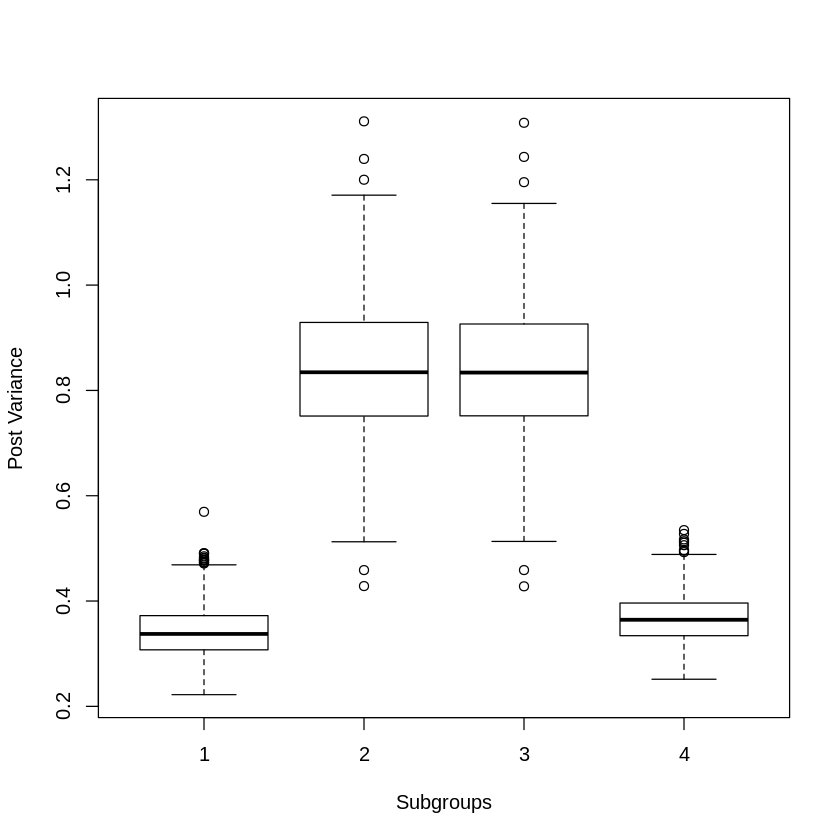

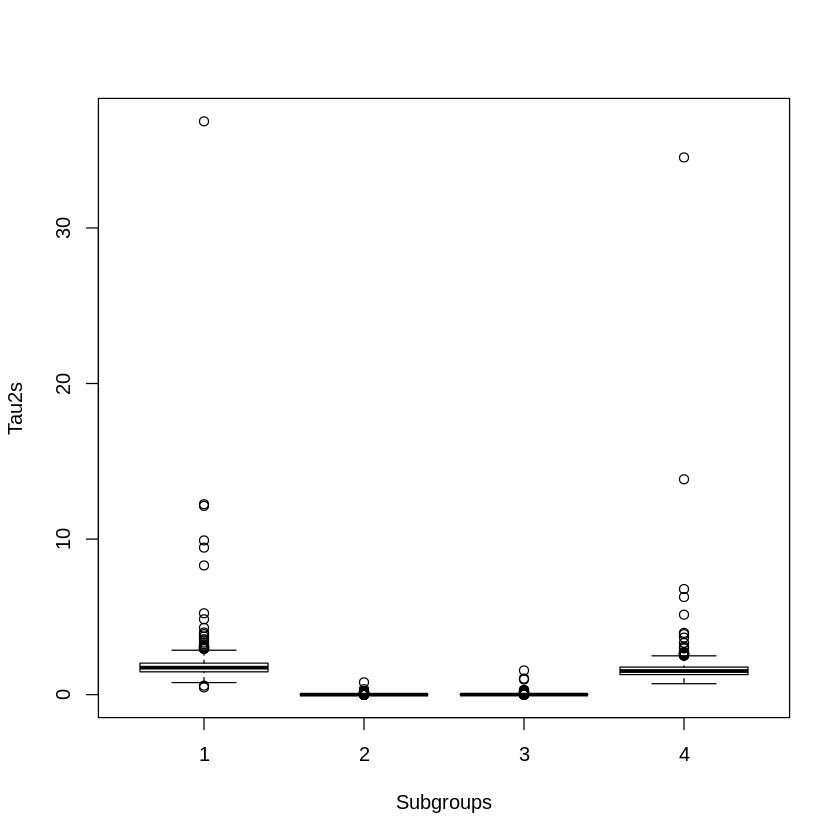

In [78]:
post.m.data <- data.frame(vars=varss, idxs=idxss, tau2s=tauss)
boxplot(vars~idxs, data=post.m.data, xlab="Subgroups", ylab="Post Variance")
boxplot(tau2s~idxs, data=post.m.data, xlab="Subgroups", ylab="Tau2s")

### Test estimated treatment effect

In [19]:
nSimu <- 1000
n <- 100
lam <- 0.10
H <- diag(c(0.1, 0.1, 0.1, 0.1)/2)

In [20]:
trt.effbs <- list()
for (i in 1:nSimu){
  # train data
  Xs.t <- gen.Data.Xs(n, x.tps)
  #Xs.t <- rbind(Xs.t, Xs.t)
  betMat <- sub.Paras.fn(Xs.t, betass)
  Zs <- c(rep(0, n/2), rep(1, n/2))
  Ys <- curMean.fn(Xs.t, Zs, betMat, b) + rnorm(n, sd=phi0)
  data <- cbind(Ys, Zs, Xs.t)
  data <- as.data.frame(data)
  names(data)[1:2] <- c("Y", "Z")
  
  
  alpMat <- sub.Paras.fn(Xs.t, alpss)
  Theta0s <- curMean.fn(Xs.t, Zs, alpMat, b=0)
  res0 <- info.est.fn(Theta0s, data, H, lam)
  res0.no <- info.est.fn(Theta0s, data, H, lam, is.borrow = F)
  res1 <- mu1.est.fn(Theta0s, data, H)
  
  effs0 <- mu0.efn(as.matrix(Xs.t), res0)
  effs0.no <- mu0.efn(as.matrix(Xs.t), res0.no)
  effs1 <- mu1.efn(as.matrix(Xs.t), res1)
  trt.eff <- mean(effs1) - mean(effs0)
  trt.eff.no <- mean(effs1) - mean(effs0.no)
  trt.effbs[[i]] <- c(trt.eff, trt.eff.no)
}

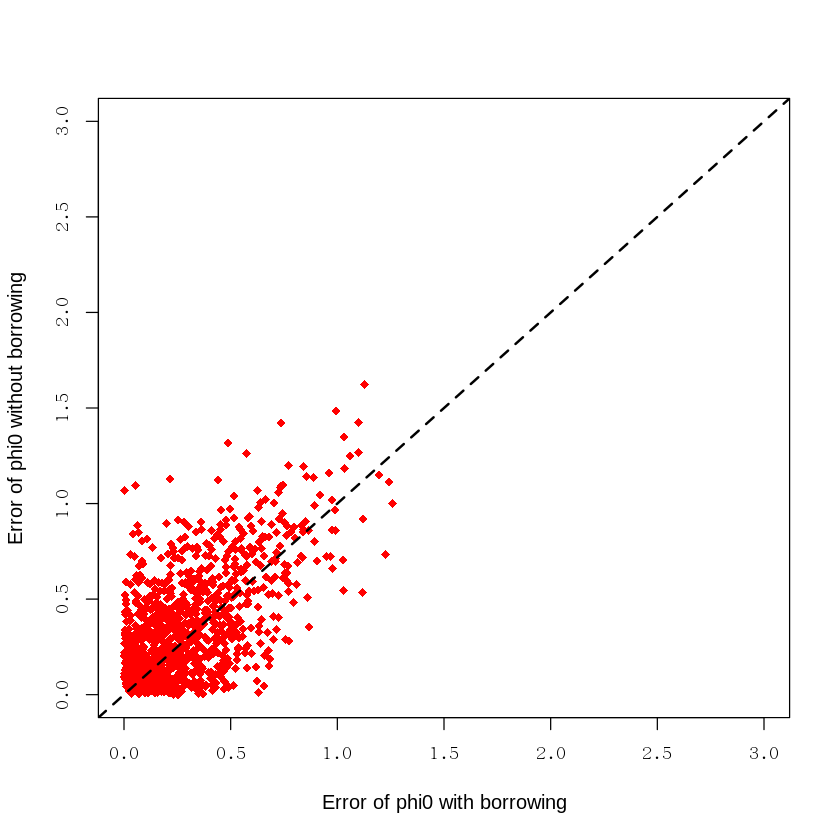

In [46]:
trt.effs.mat <- do.call(rbind, trt.effbs)
errsmat <- abs(trt.effs.mat-b)
plot(errsmat[, 1],errsmat[, 2], ylim=c(0, 3), xlim=c(0, 3), col=2, pch=18, ylab="Error of phi0 without borrowing", xlab="Error of phi0 with borrowing")
abline(a=0, b=1, col=1, lty=2, lwd=2)

In [47]:
mean(errsmat[, 1] < errsmat[, 2])
rbind(CI.fn(errsmat[, 1]), CI.fn(errsmat[, 2]))

[1] 0.604

lower,mean,upper
0.2943318,0.3090499,0.3237679
0.3585844,0.3761497,0.3937149


In [48]:
c(median(errsmat[, 1]), median(errsmat[, 2]))

[1] 0.2558969 0.3223468

In [49]:
c(sd(errsmat[, 1]), sd(errsmat[, 2]))

[1] 0.2374624 0.2833990

### Test estimate for $\phi_0$

In [68]:
lam <- 0.1
n <- 200 # n = 20, borrow good
nSimu <- 1000
H <- diag(c(2.1, 2.1, 2.1, 2.1)-2)

In [69]:
phi0s <- c()
phi0s.no <- c()
for (i in 1:nSimu){
    Xs <- gen.Data.Xs(n, x.tps)
    betMat <- sub.Paras.fn(Xs, betass)
    Zs <- rep(0, n)
    Ys <- curMean.fn(Xs, Zs, betMat, b) + rnorm(n, sd=phi0)
    data <- cbind(Ys, Zs, Xs)
    data <- as.data.frame(data)
    names(data)[1:2] <- c("Y", "Z")
    
    alpMat <- sub.Paras.fn(Xs, alpss)
    Theta0s <- curMean.fn(Xs, Zs, alpMat, b=0)
    res <- info.est.fn(Theta0s, data, H, lam)
    res0 <- info.est.fn(Theta0s, data, H, lam, is.borrow=FALSE)
    
    phi0s <- c(phi0s, res$phi0)
    phi0s.no <- c(phi0s.no, res0$phi0)
  
}

[1] 0.689

lower,mean,upper
0.04026143,0.04223446,0.04420750
0.05052407,0.05276164,0.05499921


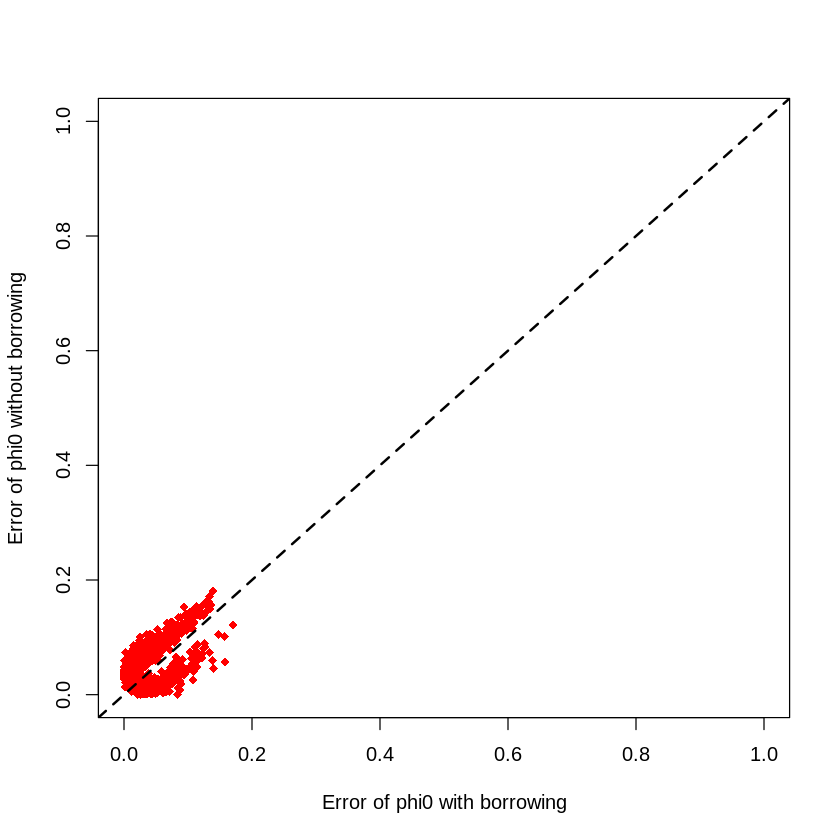

In [70]:
errs <- abs(phi0s-phi0)
errs.no <- abs(phi0s.no-phi0)
plot(errs,errs.no, ylim=c(0, 1), xlim=c(0, 1), col=2, pch=18, ylab="Error of phi0 without borrowing", xlab="Error of phi0 with borrowing")
abline(a=0, b=1, col=1, lty=2, lwd=2)
mean(errs < errs.no)
rbind(CI.fn(errs), CI.fn(errs.no))